## Feature Selection
## Splitting Data
## Building Decision Tree Model
## Evaluating the Model
## Visualizing Decision Trees
## Optimizing Decision Tree Performance

1. Selecting a Suitable Dataset:
You already have a dataset named data. It includes features like 'age,' 'income,' 'student,' 'credit_rating,' and the target variable 'buys_computer.'

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


: 

In [21]:
data = {'Company': ['Google', 'Google', 'Google', 'Google', 'Google', 'Google', 'abc pharma', 'abc pharma', 'abc pharma', 'abc pharma', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'],
        'Job': ['Sales Executive', 'Sales Executive', 'Business Manager', 'Business Manager', 'Computer programmer', 'Computer Programmer', 'Sales executive', 'Computer programmer', 'Business Manager', 'Business Manager', 'Sales Executive', 'Sales Executive', 'Business Manager', 'Business Manager', 'Computer Programmer', 'Computer Programmer'],
        'Degree': ['bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'masters', 'bachelors', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters', 'bachelors', 'masters'],
        'Salary_more_than_100k': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df

,Company,Job,Degree,Salary_more_than_100k
0,Google,Sales Executive,bachelors,0
1,Google,Sales Executive,masters,0
2,Google,Business Manager,bachelors,1
3,Google,Business Manager,masters,1
4,Google,Computer programmer,bachelors,0
5,Google,Computer Programmer,masters,1
6,abc pharma,Sales executive,masters,0
7,abc pharma,Computer programmer,bachelors,0
8,abc pharma,Business Manager,bachelors,0
9,abc pharma,Business Manager,masters,1


# Step 2: Prepare the features and target variable

---



In [34]:
x = df[['Company', 'Job', 'Degree']]
y = df[['Salary_more_than_100k']]

x = pd.get_dummies(x)
x.columns



Index(['Company_Facebook', 'Company_Google', 'Company_abc pharma',
       'Job_Business Manager', 'Job_Computer Programmer',
       'Job_Computer programmer', 'Job_Sales Executive', 'Job_Sales executive',
       'Degree_bachelors', 'Degree_masters'],
      dtype='object')

You convert categorical features into numerical format using one-hot encoding. The features DataFrame contains the input features, and the target Series contains the target variable.

# Step 3: Split the data into training and testing sets
X_train: This is your training data for the features (input variables). Your model will learn from this data to make predictions.

X_test: This is your testing data for the features. After your model has learned from the training data, you use this set to evaluate how well it generalizes to new, unseen data.

y_train: These are the corresponding labels for your training data. It's the known output that your model will try to predict.

y_test: Similarly, these are the labels for your testing data. You'll use this to check how well your model's predictions match the actual outcomes.

So, with test_size=0.3 and random_state=1, you're saying: "I want to split my data into 70% training and 30% testing, and I want the same split every time I run this code."

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


The data is split into training and testing sets using the train_test_split function. This ensures that you have separate datasets for training and evaluating the model.

# Step 4: Build a Decision Tree Classifier

Create Decision Tree model: Set up a decision tree classifier with specific settings (entropy criterion, log2 for feature selection).

Train the model: Feed it your training data (X_train and y_train) so it learns patterns.

Make predictions: Use the trained model to predict outcomes on your test data (X_test).

Evaluate accuracy: Compare predicted outcomes (y_pred) with actual outcomes (y_test) to see how well your model performs.

In [24]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_features='log2')

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6


You create a Decision Tree Classifier (dt_model) and train it using the training data (X_train and y_train).

This should resolve the issue and allow you to visualize the Decision Tree. The feature_names parameter expects a list of feature names in the same order as they appear in your data.

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))
plot_tree(clf, feature_names=x.columns.tolist(), max_depth=3, filled=True);


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:
y_pred = clf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[1, 1],
       [1, 2]])

sns.heatmap: This is a function from the Seaborn library for creating heatmaps, a graphical representation of data in a matrix format.

cm: This is likely your confusion matrix, a table used to evaluate the performance of a classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions.

annot=True: This parameter adds the numerical values to each cell of the heatmap, making it easier to interpret.

fmt='d': This specifies the format of the numerical values. In this case, it's set to 'd', which stands for integer. It ensures that the counts in the cells are displayed as integers.

cmap='Blues': This parameter sets the color map for the heatmap. 'Blues' is a colormap that goes from light to dark blue, indicating lower to higher values.

xticklabels and yticklabels: These parameters allow you to set custom labels for the x-axis (horizontal) and y-axis (vertical) ticks. In this case, it seems you're labeling the ticks with 'Predicted 0', 'Predicted 1', 'Actual 0', and 'Actual 1'.

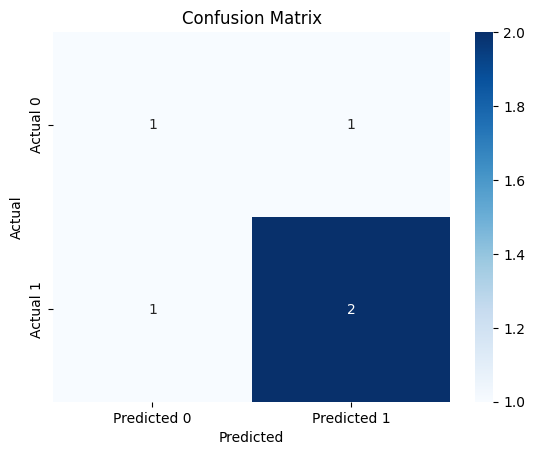

In [30]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()